<a href="https://colab.research.google.com/github/KishikTanwar1208/CODSOFT/blob/main/Copy_Project_Credit_Card_Fraud_Detection_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [ ]:
import pandas as pd # Import the pandas library and give it the alias 'pd'

train_data = pd.read_csv("/content/fraudTrain.csv")
test_data = pd.read_csv("/content/fraudTest.csv")

In [ ]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581343 entries, 0 to 581342
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             581343 non-null  int64  
 1   trans_date_trans_time  581343 non-null  object 
 2   cc_num                 581342 non-null  float64
 3   merchant               581342 non-null  object 
 4   category               581342 non-null  object 
 5   amt                    581342 non-null  float64
 6   first                  581342 non-null  object 
 7   last                   581342 non-null  object 
 8   gender                 581342 non-null  object 
 9   street                 581342 non-null  object 
 10  city                   581342 non-null  object 
 11  state                  581342 non-null  object 
 12  zip                    581342 non-null  float64
 13  lat                    581342 non-null  float64
 14  long                   581342 non-nu

(None, None)

In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,581343.000000,5.813420e+05,581342.000000,581342.000000,581342.000000,581342.000000,5.813420e+05,5.813420e+05,581342.000000,581342.000000,581342.000000
mean,290671.000000,4.164883e+17,70.260934,48763.384706,38.537104,-90.208088,8.908393e+04,1.337097e+09,38.536587,-90.208510,0.005843
std,167819.413108,1.307873e+18,158.019629,26909.420848,5.072655,13.762085,3.029032e+05,5.975420e+06,5.106413,13.774241,0.076218
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,145335.500000,1.800365e+14,9.640000,26041.000000,34.668900,-96.790900,7.430000e+02,1.332161e+09,34.739325,-96.878508,0.000000
50%,290671.000000,3.520550e+15,47.410000,48154.000000,39.354300,-87.458100,2.456000e+03,1.337757e+09,39.365644,-87.405080,0.000000
75%,436006.500000,4.642255e+15,83.100000,72011.000000,41.894800,-80.138100,2.047800e+04,1.342238e+09,41.953938,-80.212802,0.000000
max,581342.000000,4.992346e+18,25086.940000,99783.000000,66.693300,-67.950300,2.906700e+06,1.346635e+09,67.510267,-66.956540,1.000000


In [ ]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
print(train_data['is_fraud'].value_counts())

is_fraud
0.0    577945
1.0      3397
Name: count, dtype: int64


In [ ]:
train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


<ipython-input-11-0cc9553eb843>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg=sns.countplot(x='is_fraud',data=train_data,palette="pastel")


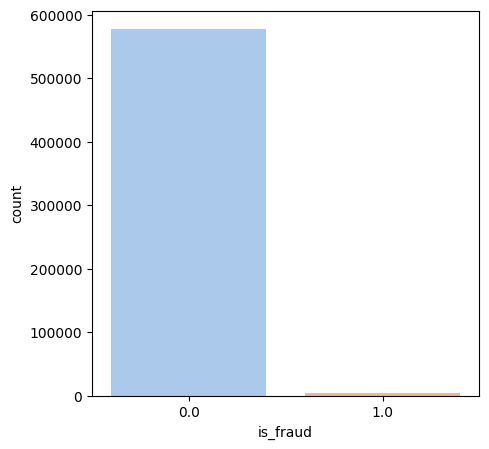

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
fg=sns.countplot(x='is_fraud',data=train_data,palette="pastel")
plt.show(fg)

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

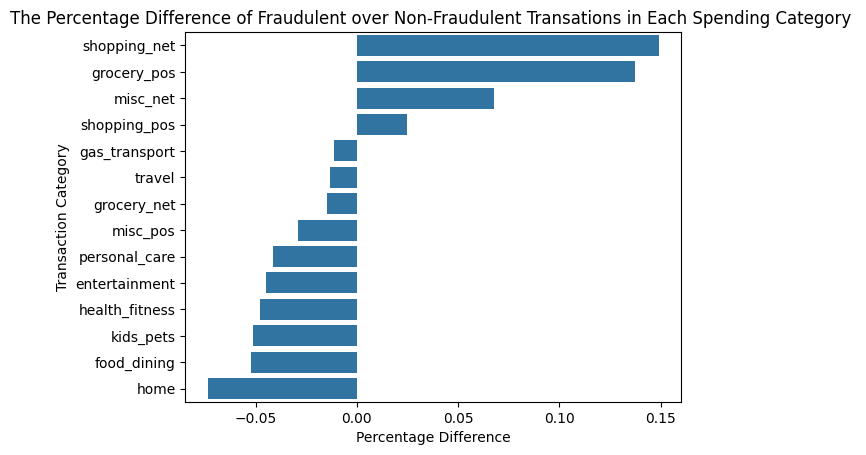

In [ ]:
a=train_data[train_data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train_data[train_data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Preprocessing

Handle Date Time

In [ ]:
train_data["trans_date_trans_time"]=pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"]=pd.to_datetime(train_data["dob"])
train_data

test_data["trans_date_trans_time"]=pd.to_datetime(test_data["trans_date_trans_time"])
test_data["dob"]=pd.to_datetime(test_data["dob"])
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


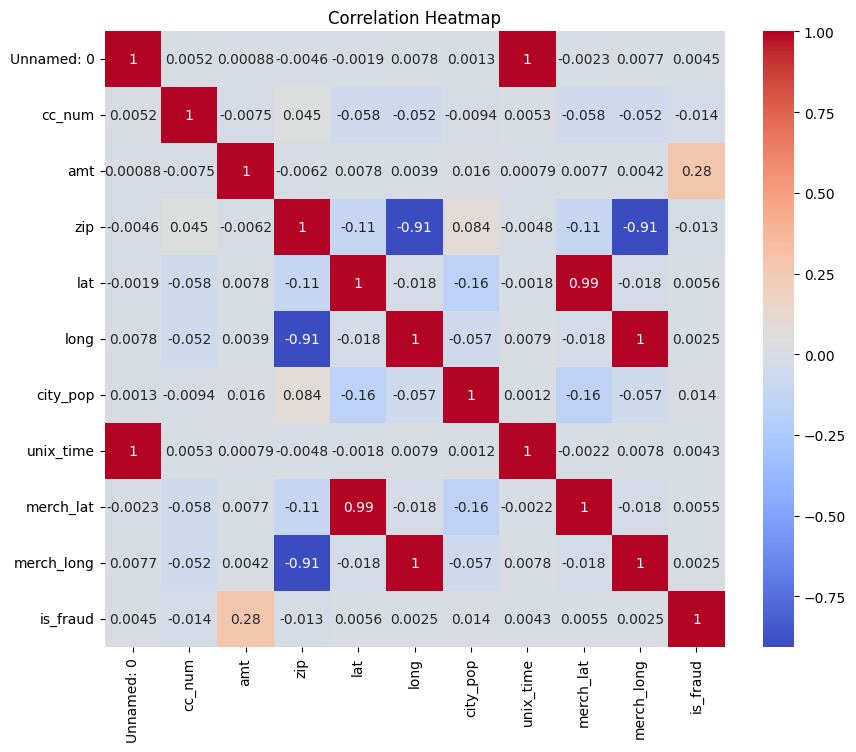

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas to work with dataframes

plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation calculation
numeric_data = train_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import pandas as pd

# Replace 'path/to/your/test_data.csv' with the actual file path
test_data = pd.read_csv('/content/fraudTest.csv')

In [ ]:
#drop columns that are not relevant to predicy fraud transaction
drop_columns = ['Unnamed: 0','cc_num','trans_num','unix_time',
               'first','last','street','zip','trans_date_trans_time','city',
               'lat','long','dob','merch_lat','merch_long','state']

# Check if columns exist before dropping
train_missing_cols = [col for col in drop_columns if col not in train_data.columns]
test_missing_cols = [col for col in drop_columns if col not in test_data.columns]

if train_missing_cols:
    print("Warning: The following columns are not in train_data:", train_missing_cols)
if test_missing_cols:
    print("Warning: The following columns are not in test_data:", test_missing_cols)

# Drop columns that exist in both DataFrames
existing_drop_columns = [col for col in drop_columns if col in train_data.columns and col in test_data.columns]
train_data.drop(columns=existing_drop_columns,inplace=True)
test_data.drop(columns=existing_drop_columns,inplace=True)

print(train_data)
print(train_data.shape)

print(test_data.head(5))
print(test_data.shape)

                                          merchant       category     amt  \
0                       fraud_Rippin, Kub and Mann       misc_net    4.97   
1                  fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                             fraud_Lind-Buckridge  entertainment  220.11   
3               fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                              fraud_Keeling-Crist       misc_pos   41.96   
...                                            ...            ...     ...   
62251           fraud_Schiller, Blanda and Johnson           home   53.37   
62252          fraud_Eichmann, Bogan and Rodriguez  gas_transport   40.56   
62253               fraud_Raynor, Feest and Miller  gas_transport   81.50   
62254  fraud_Christiansen, Goyette and Schamberger  gas_transport   56.49   
62255                              fraud_Morar Inc    grocery_net   52.16   

      gender  city_pop                                job  is_fraud  
0    

Handle Data Imbalance

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

encoder = LabelEncoder()
train_data["gender"]=encoder.fit_transform(train_data["gender"])
test_data["gender"]=encoder.fit_transform(test_data["gender"])

# ... (rest of your code)

In [ ]:
encoder = LabelEncoder()
train_data["gender"]=encoder.fit_transform(train_data["gender"])
test_data["gender"]=encoder.fit_transform(test_data["gender"])

train_data["category"]=encoder.fit_transform(train_data["category"])
test_data["category"]=encoder.fit_transform(test_data["category"])

train_data["job"]=encoder.fit_transform(train_data["job"])
test_data["job"]=encoder.fit_transform(test_data["job"])

train_data["merchant"]=encoder.fit_transform(train_data["merchant"])
test_data["merchant"]=encoder.fit_transform(test_data["merchant"])
# Assuming your DataFrame is named df
train_data['amt'] = train_data['amt'].astype(int)

# Fill missing values
train_data.fillna(-999, inplace=True)
test_data.fillna(-999, inplace=True)
test_data.fillna(-999,inplace=True)
test_data.fillna(-999,inplace=True)

# Drop rows containing -999 in train_data
train_data = train_data[train_data != -999].dropna()

# Drop rows containing -999 in test_data
test_data = test_data[test_data != -999].dropna()


Split train and test data

In [ ]:
x_train = train_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']

x_test=test_data.drop('is_fraud',axis=1)
y_test = test_data['is_fraud']

In [ ]:
train_data.head(5)
test_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,351 Darlene Green,...,33.9659,-80.9355,333497,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,3638 Marsh Union,...,40.3207,-110.4360,302,391,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,9333 Valentine Point,...,40.6729,-73.5365,34496,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,406,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0


3. EDA

2
2


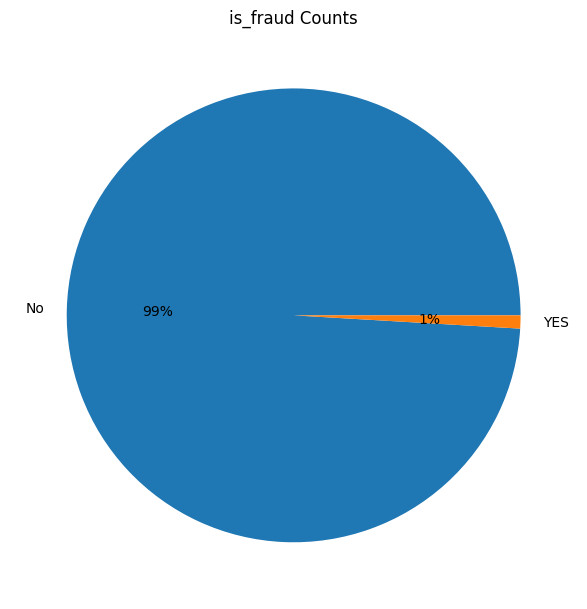

In [ ]:
exit_counts = train_data["is_fraud"].value_counts()
print(len(exit_counts))

# Define 'labels' before using it
labels=["No","YES"]
print(len(labels))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts,labels=labels, autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Random Forest

In [ ]:
print(x_train.dtypes)
print(y_train.dtypes)

merchant    int64
category    int64
amt         int64
gender      int64
city_pop    int64
job         int64
dtype: object
float64


In [ ]:
# Ensure x_test has the same columns as x_train used during training
# Replace with the actual list of columns used during training
training_columns = ["merchant", "category", "amt", "gender", "city_pop", "job"]
x_test = x_test[training_columns]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score # Import necessary functions

cla=RandomForestClassifier(n_estimators=100,random_state=42)
cla.fit(x_train,y_train)

y_pred=cla.predict(x_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : ",report)

Accuracy:  0.9969629625192435
Classification Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    166230
         1.0       0.70      0.49      0.58       709

    accuracy                           1.00    166939
   macro avg       0.85      0.74      0.79    166939
weighted avg       1.00      1.00      1.00    166939



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classification = DecisionTreeClassifier(random_state=42)
classification.fit(x_train,y_train)

y_pred=classification.predict(x_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : ",report)

Accuracy:  0.9935006199869414
Classification Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    166230
         1.0       0.33      0.50      0.39       709

    accuracy                           0.99    166939
   macro avg       0.66      0.75      0.70    166939
weighted avg       1.00      0.99      0.99    166939



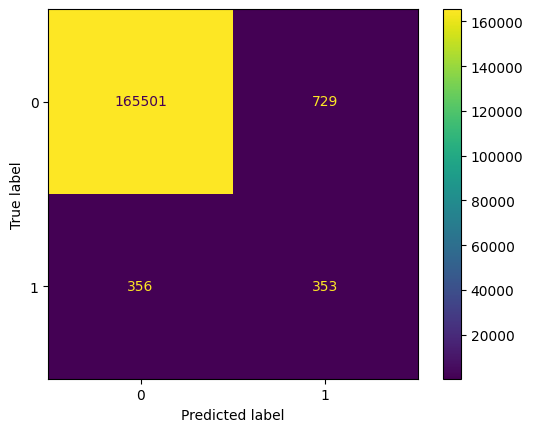

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

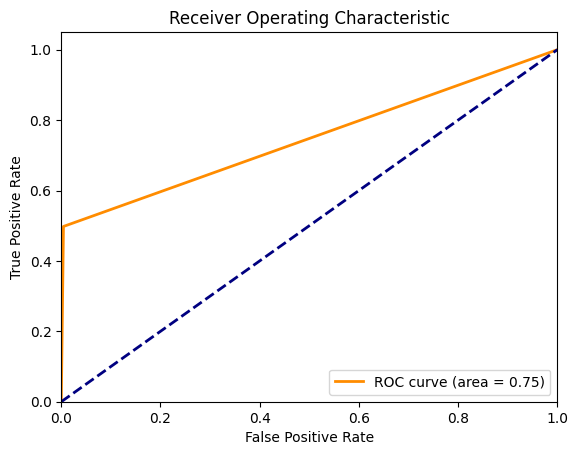

AUC: 0.746749427081464


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)